In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.utils import shuffle

# Regression and bias-variance

In [14]:
N = 20
Ntrain = 12
T = 500

Xaxis = np.linspace(0, 2*np.pi, T)
Yaxis = np.sin(3*Xaxis)

X = np.linspace(0, 2*np.pi, N).reshape(N, 1)
Y = np.sin(3*X)
X, Y = shuffle(X, Y)

Xtrain = X[:Ntrain]
Ytrain = Y[:Ntrain]

## bias-variance in decision tree regressor

In [15]:
def report_on_regressor(model, X, Y, plot_title):
  model.fit(X, Y)

  plt.scatter(X, Y, s=50, alpha=0.7, c='blue')
  plt.scatter(X, model.predict(X.reshape(len(X), 1)), s=50, alpha=0.7, c='green')
  plt.title(plot_title)
  # plt.show()

  # plt.scatter(X, Y)
  # plt.scatter(X, model.predict(X.reshape(N, 1)))
  # plt.show()

  plt.plot(Xaxis, Yaxis)
  plt.plot(Xaxis, model.predict(Xaxis.reshape(len(Xaxis), 1)))
  plt.show()

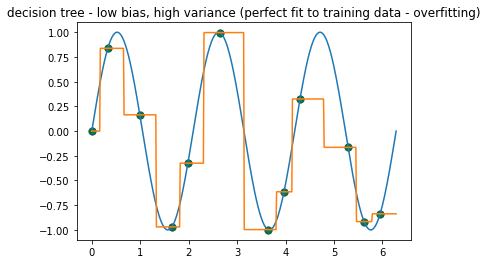

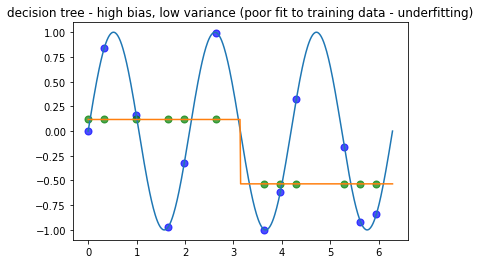

In [16]:
report_on_regressor(DecisionTreeRegressor(), Xtrain, Ytrain, plot_title='decision tree - low bias, high variance (perfect fit to training data - overfitting)')
report_on_regressor(DecisionTreeRegressor(max_depth=1), Xtrain, Ytrain, plot_title='decision tree - high bias, low variance (poor fit to training data - underfitting)')

## bias-variance in knn regressor

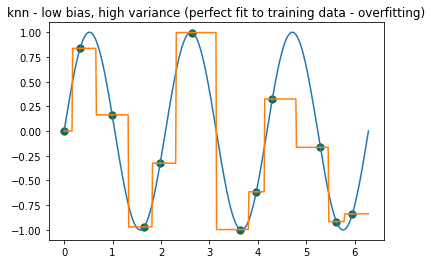

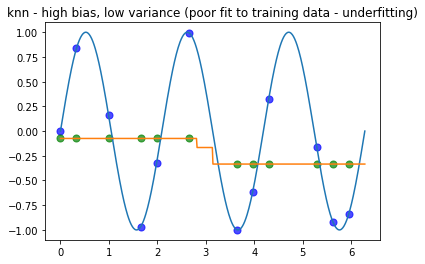

In [17]:
report_on_regressor(KNeighborsRegressor(n_neighbors=1), Xtrain, Ytrain, plot_title='knn - low bias, high variance (perfect fit to training data - overfitting)')
report_on_regressor(KNeighborsRegressor(n_neighbors=10), Xtrain, Ytrain, plot_title='knn - high bias, low variance (poor fit to training data - underfitting)')

# Classification and bias-variance

In [18]:
def plot_decision_boundary_2d(X, model):
  h = .02  # step size in the mesh
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, m_max]x[y_min, y_max].
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [19]:
def report_on_classifier(model, X, Y, plot_title):
  model.fit(X, Y)

  plt.figure(figsize=(10, 10))
  plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
  plot_decision_boundary_2d(X, model)
  plt.title(plot_title)
  plt.show()

## data generation

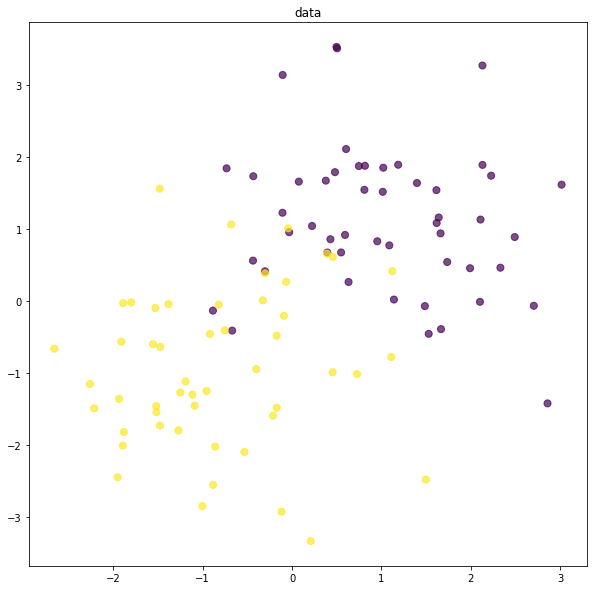

In [20]:
N = 100
D = 2
X = np.random.randn(N, D)
X[:N//2] += np.array([1, 1]) # center it at (1,1)
X[N//2:] += np.array([-1, -1]) # center it at (-1, -1)

Y = np.array([0]*(N//2) + [1]*(N//2))

plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plt.title("data")
plt.show()

## bias-variance in decision tree classitfier

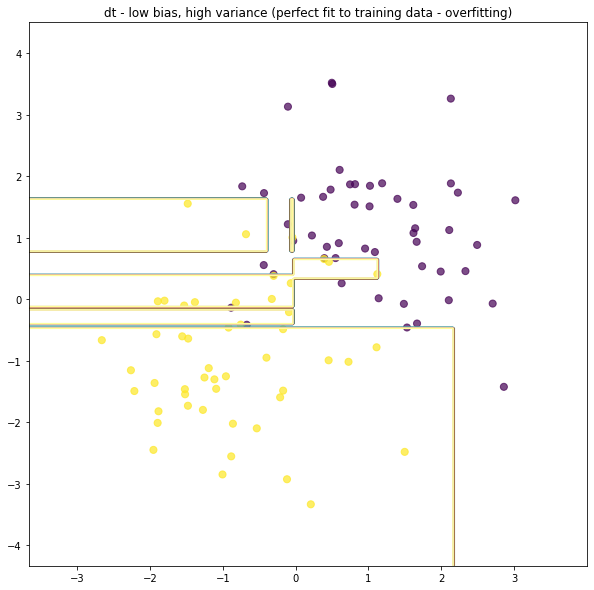

In [21]:
report_on_classifier(DecisionTreeClassifier(), X, Y, plot_title='dt - low bias, high variance (perfect fit to training data - overfitting)')

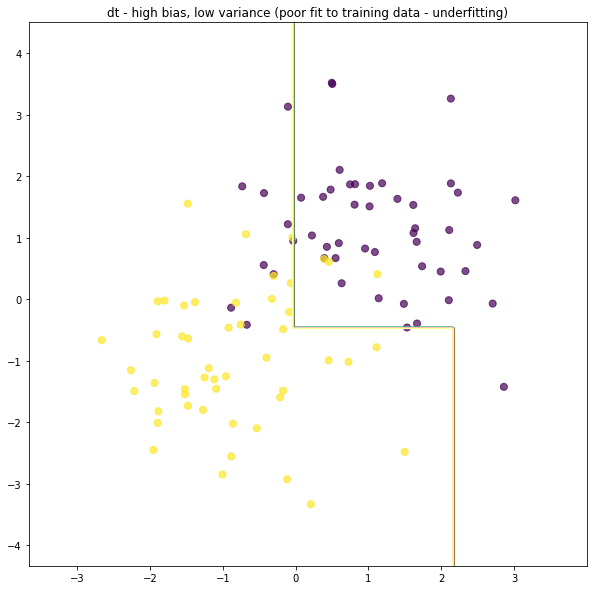

In [22]:
report_on_classifier(DecisionTreeClassifier(max_depth=2), X, Y, plot_title='dt - high bias, low variance (poor fit to training data - underfitting)')

## bias-variance in knn classifier

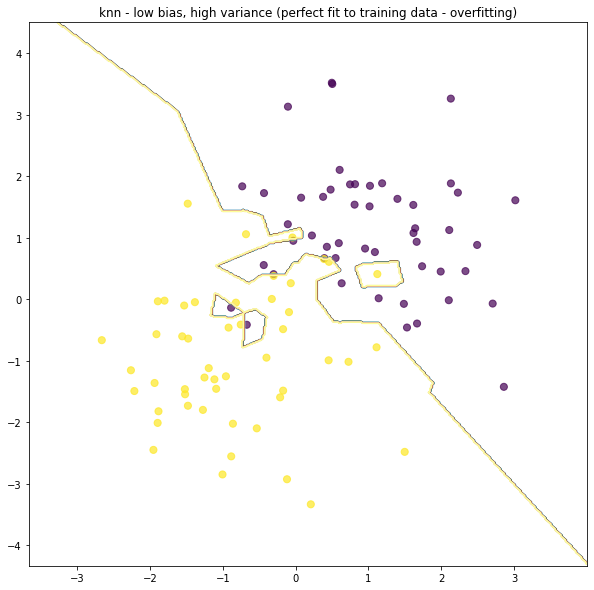

In [23]:
report_on_classifier(KNeighborsClassifier(n_neighbors=1), X, Y, plot_title='knn - low bias, high variance (perfect fit to training data - overfitting)')

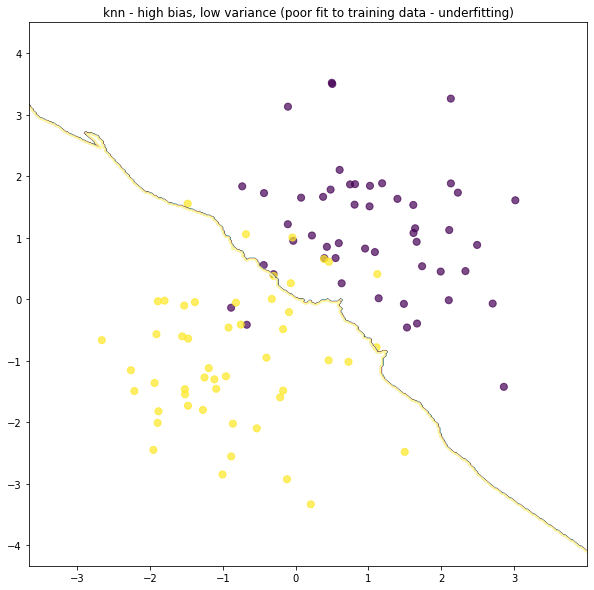

In [24]:
report_on_classifier(KNeighborsClassifier(n_neighbors=20), X, Y, plot_title='knn - high bias, low variance (poor fit to training data - underfitting)')